In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
import os
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'train.csv'
data_path = os.path.join(data_base_path, data_folder)
y, tX, ids = load_csv_data(data_path)

### Change later : Simple data description 
- all variables are floating point, except PRI_jet_num which is integer
- variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
- variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by the physicists of ATLAS.
- it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables.

In [ ]:
print('y shape = ' + str(y.shape) + '\ntX shape =' + str(tX.shape) + '\nids shape = ' + str(ids.shape))

Description of the data:
- `y` (N) is composed of the labels (-1 or 1) of all the samples.  
- `tX` (N x F) is composed of the values of the features (F) for all samples (N)  
- `ids` (N) is composed of all the index (100000-349999) of the samples (N)  
  
Moreover, the number of features is 30 (F=30) and the number of samples is 250'000 (N=250'000).

In [5]:
tX.shape[0]

250000

In [6]:
# putting the meaningless values to "nan"
tX0 = np.where(tX==-999, np.nan,tX) #nanmin nanstd

In [12]:
def plot_feature(ids, tX, y, f, bins=20):
    print ('Feature {}:'.format(f))
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot of the feature regarding the sample
    col = np.where(y==1, 'b', 'orange')
    ax[0].scatter(ids, tX[:,f], c=col)
    ax[0].set_title('Values of feature {} regarding the sample'.format(f))
    ax[0].set_xlabel('Samples')
    ax[0].set_ylabel('Values')
    
    # Histogram plot of the apprition of a given feature value
    tX_plus = []
    tX_minus = []
    for n in range(tX.shape[0]):
        if (y[n]==1):
            tX_plus.append(tX[n,f])
        elif (y[n]==-1):
            tX_minus.append(tX[n,f])
    ax[1].hist(tX_plus, bins,alpha=0.5, label='label +1', color='b')
    ax[1].hist(tX_minus, bins,alpha=0.5, label='label -1', color='orange')
    ax[1].legend(loc='upper right')
    ax[1].set_title("Histogram of factor {} distribution".format(f))
    ax[1].set_xlabel('Values of the feature {}'.format(f))
    ax[1].set_ylabel('Number of apparitions')
    
    # Table
    means, std, d, n_usable, n_tot = compute_feature(tX_minus, tX_plus)
    text = description_feature(means, std, d, n_usable, n_tot)
    ax[2].text(0.5, 0.2, text, fontsize=14, ha='center')
    plt.show()

In [8]:
def compute_feature(tX_minus, tX_plus):
    means = [ np.nanmean(tX_minus + tX_plus), np.nanmean([tX_plus]), np.nanmean([tX_minus]) ]
    std = [ np.nanstd(tX_minus+tX_plus), np.nanstd([tX_plus]), np.nanstd([tX_minus]) ]
    
    n_plus = len(tX_plus)
    n_minus = len(tX_minus)
    n_tot = n_plus+n_minus
    n_usable =  np.count_nonzero(~np.isnan(tX_minus))+np.count_nonzero(~np.isnan(tX_plus))
    
    inter_class = n_plus*(means[1]-means[0])**2 + n_minus*(means[2]-means[0])**2; 
    intra_class = (n_plus-1)*std[1] + (n_minus-1)*std[2];
    d = inter_class / intra_class
    
    return means, std, d, n_usable, n_tot


def description_feature(means, std, d, n_usable, n_tot):
    text = "means:" + '\n'
    text += "tot -- (+1) -- (-1)" + '\n'
    text += "{}".format(round(means[0],2)) + " -- " + "{}".format(round(means[1],2)) + " -- " + "{}".format(round(means[2],2)) + '\n' + '\n'
    text += "std:" + '\n'
    text += "tot -- (+1) -- (-1)" + '\n'
    text += "{}".format(round(std[0],2)) + " -- " + "{}".format(round(std[1],2)) + " -- " + "{}".format(round(std[2],2)) + '\n' + '\n'
    text += "d:" + '\n'
    text += "{}".format(d) + '\n' + '\n'
    text += "usable n:"+ '\n'
    text += "{}/{} = {}%".format(n_usable, n_tot, round(100*n_usable/n_tot))
    return text

Feature 2:


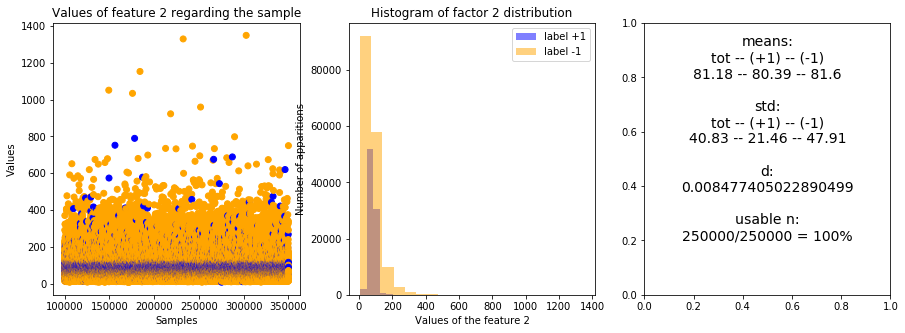

Feature 6:


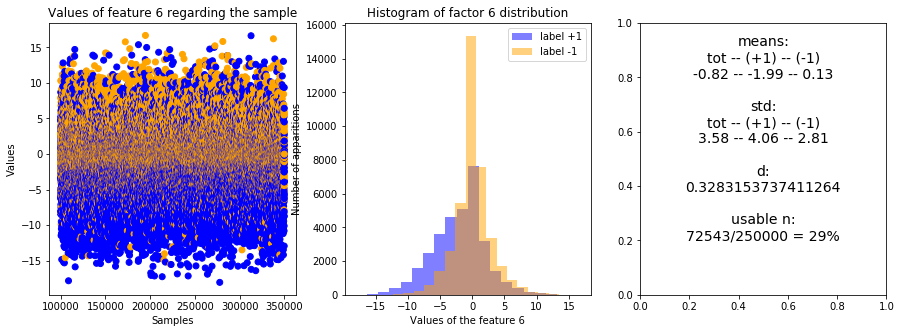

Feature 10:


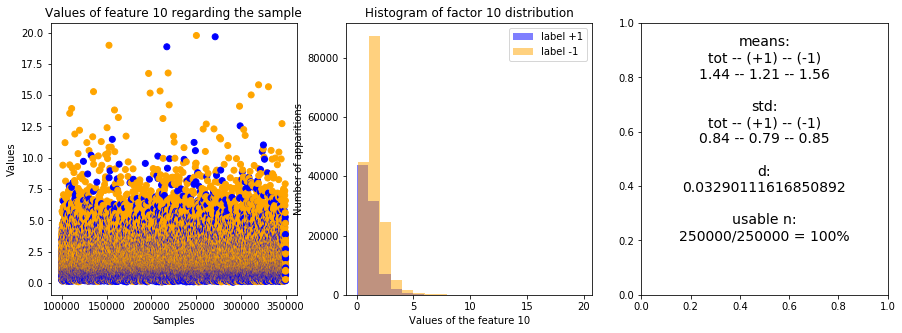

Feature 15:


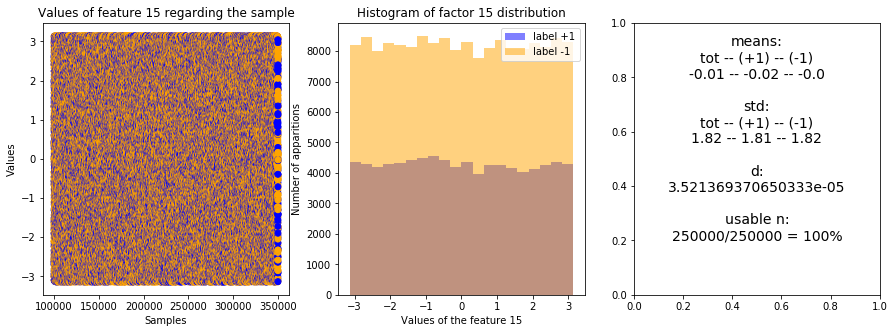

Feature 20:


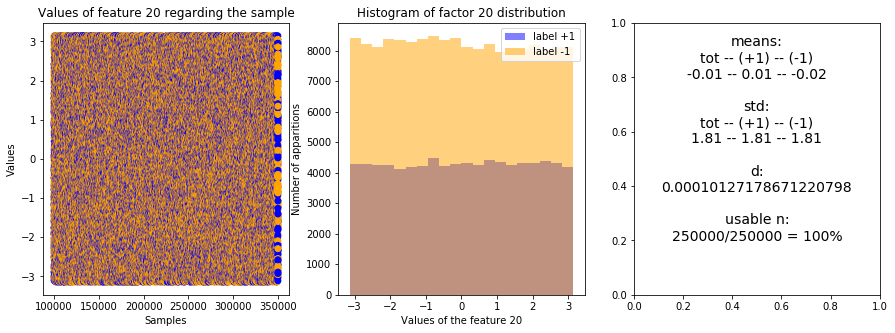

Feature 27:


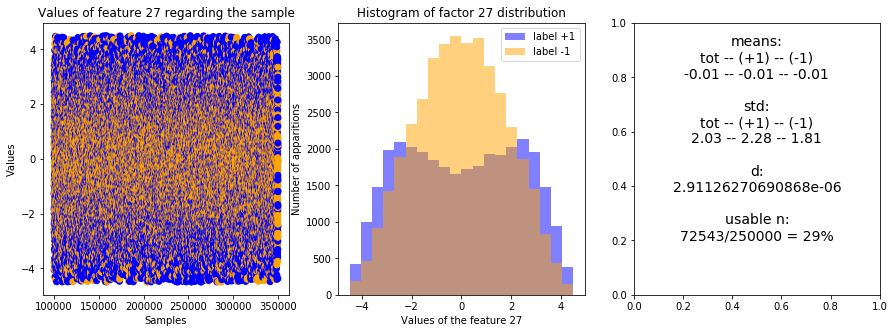

In [13]:
for f in [2, 6, 10, 15, 20, 27] :
    plot_feature(ids, tX0, y, f)

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)